In [ ]:
train_dir=r'/content/drive/MyDrive/FYP_Dataset/train'
test_dir=r'/content/drive/MyDrive/FYP_Dataset/test'
validation_dir=r'/content/drive/MyDrive/FYP_Dataset/validation'
from keras import layers
from keras.callbacks import ModelCheckpoint

from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(400, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='Softmax'))
model.summary()
  
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(learning_rate=0.00025),
metrics=['acc'])
batch_Size=12
from keras.preprocessing.image import ImageDataGenerator
train_datagen = train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(400, 400),
batch_size=batch_Size,
class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
    target_size=(400, 400),
batch_size=batch_Size,
class_mode='categorical')
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

print("length is:",(len(validation_generator.filenames)//batch_Size))
history = model.fit(
train_generator,
steps_per_epoch=len(train_generator.filenames)//batch_Size,
epochs=100,callbacks=[model_checkpoint_callback],
validation_data=validation_generator,
validation_steps=len(validation_generator.filenames)//batch_Size)
model.save('FYp6.h5')
print("done")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 128)      0

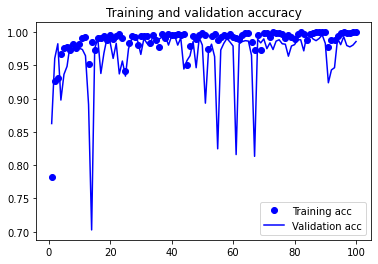

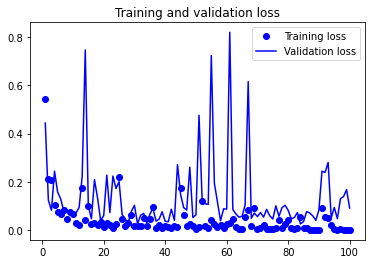

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(400, 400),
batch_size=20,
class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1503 images belonging to 6 classes.
50/50 [==============================] - 279s 6s/step - loss: 0.8260 - acc: 0.9050
test acc: 0.9049999713897705
